# Problem Set 1
    Group members: Onat Tekin, Ozan Özdemir, Igor Kaplun, Kunteng Wang, Anna Valiullina 

### General Information about the data
    
    The descriptive process of TelCO customers data has been analysed in terms of two main categories: categorical information and numerical information. The first part of this notebook is going to introduce some relations between categories of each column and churn/loyal customers.

    Before presenting the results, it should be noted that three fundamental functions have been defined to conduct the analysis. 

    First function 'Percentage' is following an approach in a way that explains the percentage distribution of each category with respect to the corresponding column. For example, if the column is "Partner", the category "0" will present the percentage of "No" and category "1" will present the percentage of "Yes". There are three types of data for the first function: All Customers, Churning Customers, and Loyal Customers. By comparing the results, we may get some intuition about the differences between Churning and Loyal Customers. 

    Second function 'ChurnPer' presents the percentage distribution of churning customers with respect to each category. For example, if the column is "Partner", the category "0" will present the churning percentage of customers who are in the "No".

    Third function 'LoyPer' presents the percentage distribution of loyal customers with respect to each category. For example, if the column is "Partner", the category "0" will present the loyal percentage of customers who are in the "No".

    One thing that should be noted that the second and the third function are the complementary functions. When we add the results in the same column and same row, we will get 100%.

In [43]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

########## FUNCTIONS ###########

### The Factor Percentage Distribution Function ###
def percentage(factorized_dat):
    
    # To obtain the columns that have "factor" inputs
    mask = ((factorized_dat == factorized_dat) | factorized_dat.isnull()) & (factorized_dat.dtypes == 'O')
    masked_data = factorized_dat[mask].dropna(axis=1)
    
    # To convert the string factor into numeric factor
    factor = masked_data.apply(lambda x: pd.factorize(x, sort = True)[0])
    
    # To create the factorized data
    column_list = factor.columns[1:len(factorized_dat.columns)]
    factorized_dat[column_list]=factor[column_list]

    # To find the percentages of factors with respect to each column
    val = pd.DataFrame(index = range(0,4),columns =column_list )
    for col in column_list:
        tmp = factorized_dat[col]
        stat=np.zeros(max(tmp)+1)
        for i in range(min(tmp),max(tmp)+1):
            stat[i] = len(tmp[tmp==i])/len(tmp)*100
        val[col] = pd.Series(stat)

    val = val.fillna(0).round(2)
    return val;

### Churning Percentage of Each Factor in the Columns ###
def ChurnPer(factorized_dat):
    # To obtain the columns that have "factor" inputs
    mask = ((factorized_dat == factorized_dat) | factorized_dat.isnull()) & (factorized_dat.dtypes == 'O')
    masked_data = factorized_dat[mask].dropna(axis=1)
    
    # To convert the string factor into numeric factor
    factor = masked_data.apply(lambda x: pd.factorize(x, sort = True)[0])
    
    # To convert string categories to the numeric factorized data
    column_list = factor.columns[1:len(factorized_dat.columns)]
    column_list = column_list[:-1]
    # To find the percentages of factors with respect to each column
    val = pd.DataFrame(index = range(0,4),columns =column_list )
    for col in column_list:
        column = [col,'Churn']
        tmp = factor[column]
        stat=np.zeros(max(tmp[col])+1)
        for i in range(min(tmp[col]),max(tmp[col])+1):
            stat[i] = len(tmp[(tmp[col]==i) & (tmp['Churn']==1)])/len(tmp[tmp[col]==i])*100
        val[col] = pd.Series(stat)
    val = val.fillna(0).round(2)
    return val;

### Loyal Percentage of Each Factor in the Columns ###
def LoyPer(factorized_dat):
    # To obtain the columns that have "factor" inputs
    mask = ((factorized_dat == factorized_dat) | factorized_dat.isnull()) & (factorized_dat.dtypes == 'O')
    masked_data = factorized_dat[mask].dropna(axis=1)
    
    # To convert the string factor into numeric factor
    factor = masked_data.apply(lambda x: pd.factorize(x, sort = True)[0])
    
    # To create the factorized data
    column_list = factor.columns[1:len(factorized_dat.columns)]
    column_list = column_list[:-1]
    # To find the percentages of factors with respect to each column
    val = pd.DataFrame(index = range(0,4),columns =column_list )
    for col in column_list:
        column = [col,'Churn']
        tmp = factor[column]
        stat=np.zeros(max(tmp[col])+1)
        for i in range(min(tmp[col]),max(tmp[col])+1):
            stat[i] = len(tmp[(tmp[col]==i) & (tmp['Churn']==0)])/len(tmp[tmp[col]==i])*100
        val[col] = pd.Series(stat)
    val = val.fillna(0).round(2)
    return val;

### The types of the values (categorical / numerical)
    The types of variables must be analysed in the first place. During the procedure, we notice 
    that the python notebook perceives Senior Citizen and Total Charges as "Numeric" 
    and "Categorical"; therefore, their types are changed into "Categorical" and "Numerical".

In [44]:
# Dataframe preparation
dataframe = pd.read_csv("Telco-Customer-Churn.csv")
dataframe['SeniorCitizen'] = dataframe['SeniorCitizen'].astype('O')
dataframe['TotalCharges'] = pd.to_numeric(dataframe['TotalCharges'],errors = 'coerce')
dataframe['tenure'] = pd.to_numeric(dataframe['tenure'],errors = 'coerce')

dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null object
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7032 non-null float64
Churn               7043 non-null object
dtypes: float64(2), int64(1), o

### Legend to show the 'string names' of 0, 1, 2, 3 for each features (columns)
    As we carry out our first analysis based on factors such as (0-1-2-3), a legend must be 
    created to define which factor symbolises which category with respect to columns. This legend  would be the heart of percentage analysis and it should be used as a reference point to 
    understand the further results.

In [45]:
factorized_dat = dataframe.copy()
mask = ((factorized_dat == factorized_dat) | factorized_dat.isnull()) & (factorized_dat.dtypes == 'O')
masked_data = factorized_dat[mask].dropna(axis=1)
# To create the factorized data
column_list = masked_data.columns[1:len(factorized_dat.columns)]
val = pd.DataFrame(index = range(0,4), columns = column_list )
for col in column_list:
    val[col] = pd.Series(masked_data[col].unique()).sort_values().reset_index(drop=True)
val = val.fillna(0)
val

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,0,No,No,No,No,DSL,No,No,No,No,No,No,Month-to-month,No,Bank transfer (automatic),No
1,Male,1,Yes,Yes,Yes,No phone service,Fiber optic,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Credit card (automatic),Yes
2,0,0,0,0,0,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Two year,0,Electronic check,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Mailed check,0


In [46]:
# General Customers Data
general = dataframe.copy()

# Churning Customers Index
churning = dataframe[dataframe['Churn']=='Yes'].index
churning_percentage = dataframe.iloc[churning,:].drop(['TotalCharges','Churn'],axis=1)

# Loyal Customers Index
loyal = dataframe[dataframe['Churn']=='No'].index
loyal_percentage = dataframe.iloc[loyal,:].drop(['TotalCharges','Churn'],axis=1)


### Display The Distribution of Customers ### 
print("The Factor Distribution of General Customer Data")
# General Customer Distribution
display(percentage(general))

print("\n","The Factor Distribution of Churning Customer Data")
# Churning Customer Distribution
display(percentage(churning_percentage))

print("\n","The Factor Distribution of Loyal Customer Data")
# Loyal Customer Distribution
display(percentage(loyal_percentage))

The Factor Distribution of General Customer Data


,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,49.52,83.79,51.7,70.04,9.68,48.13,34.37,49.67,43.84,43.94,49.31,39.90,39.54,55.02,40.78,21.92,73.46
1,50.48,16.21,48.3,29.96,90.32,9.68,43.96,21.67,21.67,21.67,21.67,21.67,21.67,20.91,59.22,21.61,26.54
2,0.00,0.00,0.0,0.00,0.00,42.18,21.67,28.67,34.49,34.39,29.02,38.44,38.79,24.07,0.00,33.58,0.00
3,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.89,0.00



 The Factor Distribution of Churning Customer Data


,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,50.24,74.53,64.21,82.56,9.1,45.43,24.56,78.17,65.97,64.79,77.37,50.40,50.19,88.55,25.09,13.80
1,49.76,25.47,35.79,17.44,90.9,9.10,69.40,6.05,6.05,6.05,6.05,6.05,6.05,8.88,74.91,12.41
2,0.00,0.00,0.00,0.00,0.0,45.48,6.05,15.78,27.98,29.16,16.59,43.55,43.77,2.57,0.00,57.30
3,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,16.48



 The Factor Distribution of Loyal Customer Data


,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,49.27,87.13,47.18,65.52,9.9,49.11,37.92,39.37,35.85,36.41,39.18,36.10,35.70,42.91,46.44,24.86
1,50.73,12.87,52.82,34.48,90.1,9.90,34.77,27.31,27.31,27.31,27.31,27.31,27.31,25.26,53.56,24.93
2,0.00,0.00,0.00,0.00,0.0,40.99,27.31,33.32,36.84,36.28,33.51,36.59,36.99,31.83,0.00,25.01
3,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,25.20


    One of the most important results will be presented below. We can easily define which types of customers tend to be churning or loyal.

In [47]:
print("The Churning Percentages of Each Factor in the Columns")
display(ChurnPer(dataframe))

print("\n","The Loyal Percentages of Each Factor in the Columns")
display(LoyPer(dataframe))

The Churning Percentages of Each Factor in the Columns


,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,26.92,23.61,32.96,31.28,24.93,25.04,18.96,41.77,39.93,39.13,41.64,33.52,33.68,42.71,16.33,16.71
1,26.16,41.68,19.66,15.45,26.71,24.93,41.89,7.40,7.40,7.40,7.40,7.40,7.40,11.27,33.57,15.24
2,0.00,0.00,0.00,0.00,0.00,28.61,7.40,14.61,21.53,22.50,15.17,30.07,29.94,2.83,0.00,45.29
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,19.11



 The Loyal Percentages of Each Factor in the Columns


,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,73.08,76.39,67.04,68.72,75.07,74.96,81.04,58.23,60.07,60.87,58.36,66.48,66.32,57.29,83.67,83.29
1,73.84,58.32,80.34,84.55,73.29,75.07,58.11,92.60,92.60,92.60,92.60,92.60,92.60,88.73,66.43,84.76
2,0.00,0.00,0.00,0.00,0.00,71.39,92.60,85.39,78.47,77.50,84.83,69.93,70.06,97.17,0.00,54.71
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,80.89


### Important features for churning customers
    To see which features (columns) are important to determine common properties of churning 
    customers and loyal customers we created the following functions. This fucntions parse the
    dataframe for a specified percentage and take the columns which features above the benchmark.
    
    For example, we set the threshold as 40%. We get a new dataframe with values greater than 40%.
    When we observe the results we see that if the contract type of a customer is 'month-to-month' it  is more likely (>40%) that this customer will be among churning customers.
    
    Below, we plot a bar chart which shows these features with high percentage of churning 
    customers. The corresponding values 0, 1, 2, 3 can be seen above in the table called val as
    legend for values.

The Customer Categories that have high churning percentages


{'SeniorCitizen': 1,
 'InternetService': 'Fiber optic',
 'OnlineSecurity': 'No',
 'TechSupport': 'No',
 'Contract': 'Month-to-month',
 'PaymentMethod': 'Electronic check'}

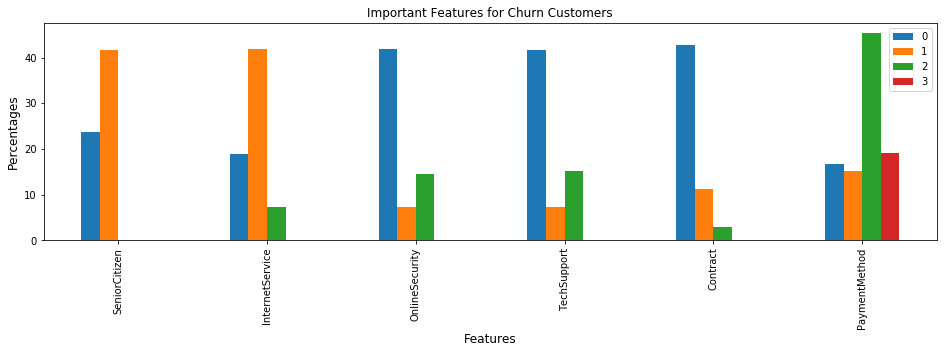

In [48]:
df = ChurnPer(dataframe)
df2 = df[df>40]

importantFeatures2 = {}

for col in df2.columns:
    tempor = df2.notna()
    if bool(tempor.index[tempor[col]].tolist()) == True:
        importantFeatures2[col] = val.iloc[tempor.index[tempor[col]].tolist()[0]][df.columns.get_loc(col)]

counter = 0;
a = []
for col in df.columns:
    for coll in importantFeatures2.keys():
        if col == coll:
            a.append(counter)
    counter += 1
        #a = [1, 5]
dftodisplay = df.iloc[0:4, a]
ax = dftodisplay.T.plot.bar(title='Important Features for Churn Customers', legend=True, figsize=(16,4))
plt.xlabel('Features', fontsize=12)
plt.ylabel('Percentages', fontsize=12)

print("The Customer Categories that have high churning percentages")
display(importantFeatures2)

### Important features for loyal customers
    Again to see which features (columns) are important to determine common properties of loyal
    customers we created this second functions. This fucntion parses the dataframe for a specified
    percentage and take the columns which features are above the benchmark.
    
    For example, we set the threshold as 90%. We get a new dataframe with values greater than 90%.
    When we observe the results we see that if the contract type of a customer is '2 years' it is
    more likely (>90%) that this customer will be among loyal customers.
    
    Below, we plot a bar chart which shows these features with high percentage of loyal customers.
    The corresponding values 0, 1, 2, 3 can be seen above in the table called val as legend for
    values.

The Customer Categories that have high loyal percentages


{'InternetService': 'No',
 'OnlineSecurity': 'No internet service',
 'OnlineBackup': 'No internet service',
 'DeviceProtection': 'No internet service',
 'TechSupport': 'No internet service',
 'StreamingTV': 'No internet service',
 'StreamingMovies': 'No internet service',
 'Contract': 'Two year'}

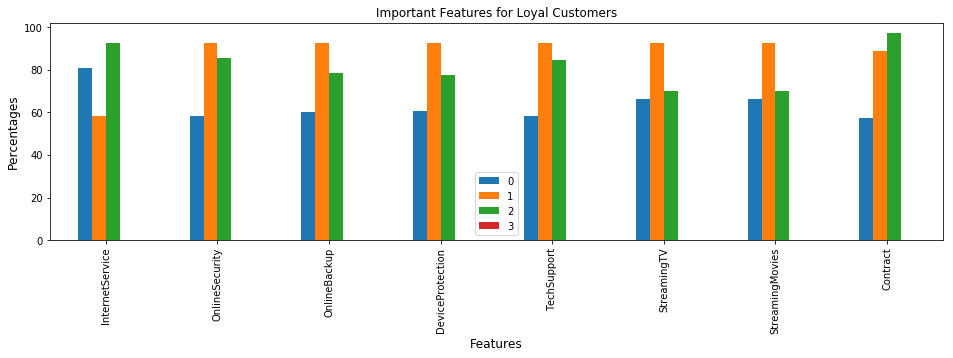

In [49]:
df = LoyPer(dataframe)
df1 = df[df>90]

importantFeatures = {}

for col in df1.columns:
    tempor = df1.notna()
    if bool(tempor.index[tempor[col]].tolist()) == True:
        importantFeatures[col] = val.iloc[tempor.index[tempor[col]].tolist()[0]][df.columns.get_loc(col)]
counter = 0;
a = []
for col in df.columns:
    for coll in importantFeatures.keys():
        if col == coll:
            a.append(counter)
    counter += 1
        #a = [1, 5]
dftodisplay = df.iloc[0:4, a]
ax = dftodisplay.T.plot.bar(title='Important Features for Loyal Customers', legend=True, figsize=(16,4))
plt.xlabel('Features', fontsize=12)
plt.ylabel('Percentages', fontsize=12)
print("The Customer Categories that have high loyal percentages")
display(importantFeatures)

    Now Let's look at the Churned and Loyal customers tenure time joint histogram. As it follows from  the plot, the majority of churned customers aborted their contracts on the very early stages: a few months after they had started. On the other hand, the majoriy of loyal customers have             stayed with the company for all the sample period. It is clear that once the customer decided         to continue the contract during the first several months, he or she will stay with the company for a long period thereafter. 

Text(0, 0.5, 'Number of customers')

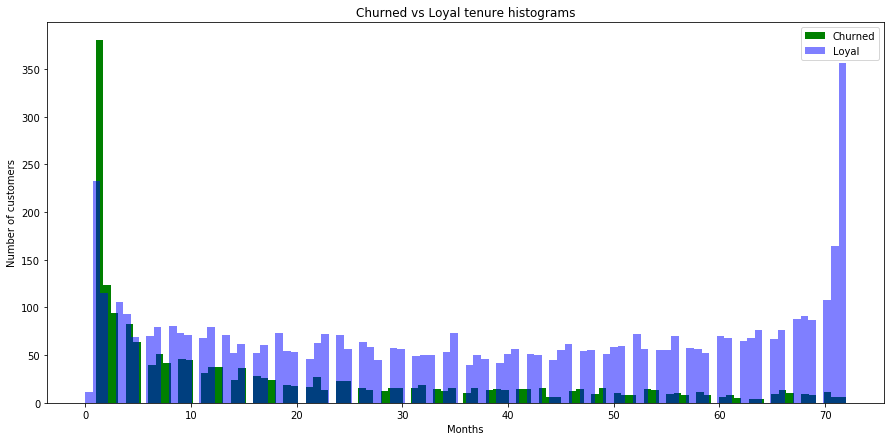

In [50]:
fig = plt.subplots(1,figsize=(15,7))

p1=plt.hist(dataframe[dataframe['Churn']=='Yes']['tenure'],bins=100,color='g')
p2=plt.hist(dataframe[dataframe['Churn']=='No']['tenure'],bins=100,color='b',alpha=0.5)

plt.legend(['Churned','Loyal'])
plt.title('Churned vs Loyal tenure histograms')
plt.xlabel('Months')
plt.ylabel('Number of customers')

    In order to look more precisely at the aforementioned finding, let's build ф box plot of the
    tenure time for the Loyal and Churned customers. It becomes evident, that the average tenure 
    time for loyal ones is significantly highter than that for the churned ones. Moreover, we can see that the box that represents loyal customers is much wider than the one attributed to the churned customers, which shows that the number of time periods when people usually turn away                 is relatively small. We can also conclud from the right box plot that the distribution of    'churning time periods' is negatively skewed, which represents the statement another time.

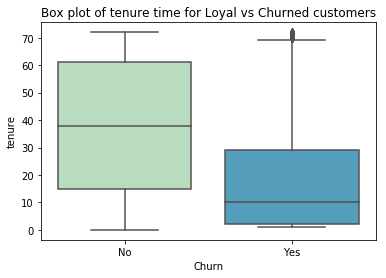

In [51]:
plt.title('Box plot of tenure time for Loyal vs Churned customers')
sns.boxplot(x='Churn',y='tenure',data=dataframe,palette='GnBu')
plt.show()

    Let us then look at the perculiarities of the loyal part of the customers: the dependencies of the categorical variables. In order to work with the categorical variables we firstly need to convert them into the numerical type by assigning each unique value of any variable its                 fraction along the unique values of the column.

In [52]:
num_data=dataframe.copy() # we copy the initial dataframe so that it remained unchanged

cat_columns=['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection',
            'TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn']
cat_values=list(map(lambda i: dataframe[cat_columns[i]].unique(),range(len(cat_columns)) )) # pick unique values along each 
# variable

for i in range(len(cat_columns)): # replace the cat values with their proportions in the relevant column
    for j in range(len(cat_values[i])):
        num_data[cat_columns[i]].replace(to_replace=cat_values[i][j],
                                         value=len(dataframe[dataframe[cat_columns[i]]==cat_values[i][j]])/len(cat_columns[i]),
            inplace=True)

    Then we build a heatmap to show the correlations between the variables. The obtained heatmap
    illustrates that loyal customers tend to purchase many of the company's products and services altogether: Online Security, Device Protection, Tech Support, Streaming TV, Streaming Movies. At the same time, the purchase of the aforementioned services is not anyhow related to the use of the Phone Service, which means that they are used by the different groups of customers. 

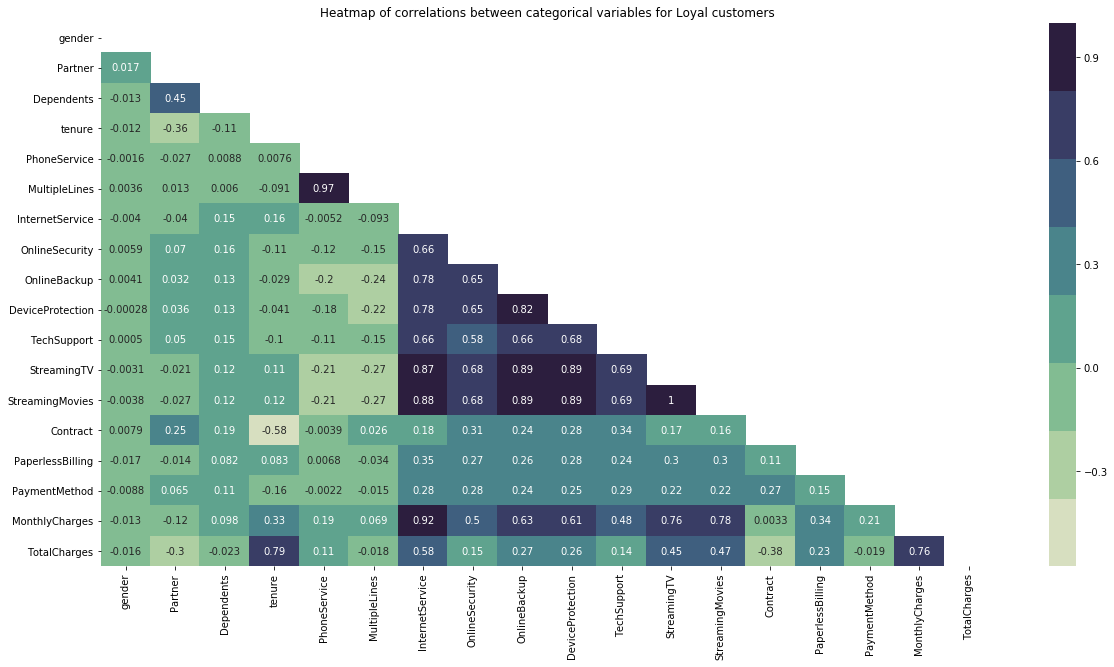

In [53]:
def heatmap(dataframe, show_chart = True): # build the corr matrix and then make the heatmap out of it
    fig = plt.figure(figsize = (20,10))
    corr = dataframe.corr()
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True
    plt.title('Heatmap of correlations between categorical variables for Loyal customers')
    if show_chart == True:
        sns.heatmap(corr, 
                    xticklabels=corr.columns.values,
                    yticklabels=corr.columns.values,
                    cmap=sns.cubehelix_palette(8, start=.5, rot=-.75),mask=mask,
                    annot=True)
    return corr

corr=heatmap(num_data[num_data['Churn']==1034.8].drop('Churn',axis=1),show_chart=True) 

## Reasons for churning
Here we tried to find reasons for people to churn. Our proposal is that there are some products in Telco Company which are expensive. For this, we plot monthly charges for loyal and for churn customers.

Median monthly charges equal  70.0
Median monthly charges for Customers equal  64.0
Median monthly charges for Churns equal 80.0, which is higher than for Loyal Customers


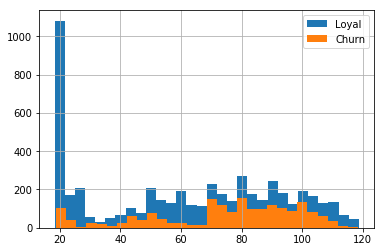

In [54]:
Loyal = dataframe[dataframe.Churn == "No"]
Churn = dataframe[dataframe.Churn == "Yes"]
num_loyal = len(Loyal)
num_churn = len(Churn)
print('Median monthly charges equal ', round(np.median(dataframe.MonthlyCharges)))
print('Median monthly charges for Customers equal ', round(np.median(Loyal.MonthlyCharges)))
print('Median monthly charges for Churns equal {}, which is higher than for Loyal Customers'.format(round(np.median(Churn.MonthlyCharges))))

Loyal.MonthlyCharges.hist(bins = 30, label = 'Loyal')
Churn.MonthlyCharges.hist(bins = 30, label = 'Churn')
plt.legend()
plt.show()

    We can see that among loyal customers there are a lot of people who use the cheapest tariff.       In order to see if there is a real problem with payments (the price is too high), we should           delete those customers with the lowest tariff from consideration. We are doing it because we         would like to construct the distribution of the payments and these irrelevant data (for               finding too expensive products) could harm our approximation. In addition, there are a           number of Loyal Customers who pay even more than any churn. In order to investigate what               happened (why people leave the company), it would be more precise if we don't consider Loyal         customers who pay more than any churn.

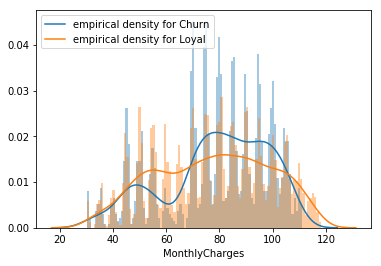

Having eluminated people with the lowest tariff from both Loyal and Churn customers we got:
Median monthly charges for Customers equal  78.85
Median monthly charges for Churns equal {}, which is higher than for Loyal Customers 80.85


In [55]:
sns.distplot(Churn[(Churn.MonthlyCharges > 30) & (Churn.MonthlyCharges < Churn.MonthlyCharges.quantile(0.99))].MonthlyCharges,
             bins = 100, hist=True, kde=True, kde_kws={"label": "empirical density for Churn"})

sns.distplot(Loyal[(Loyal.MonthlyCharges > 30) & (Loyal.MonthlyCharges < Churn.MonthlyCharges.max())].MonthlyCharges,
             bins = 100, hist=True, kde=True, kde_kws={"label": "empirical density for Loyal"})

plt.legend()
plt.show()
print('Having eluminated people with the lowest tariff from both Loyal and Churn customers we got:')

print('Median monthly charges for Customers equal ', 
      np.median(Loyal[(Loyal.MonthlyCharges > 30) & (Loyal.MonthlyCharges < Loyal.MonthlyCharges.quantile(0.99))].MonthlyCharges))

print('Median monthly charges for Churns equal {}, which is higher than for Loyal Customers',
      np.median(Churn[(Churn.MonthlyCharges > 30) & (Churn.MonthlyCharges < Churn.MonthlyCharges.max())].MonthlyCharges))

    Here we see that there are a lot of customers who are leaving the company when the price is         between 50 and 70. Probably those products seem to be way too expensive from the customer's           point of view (the real value of those products is cheaper). If we believe that young people         are more likely to leave the company if the price is too high, then we can use it to verify if       there is a case of too high prices.

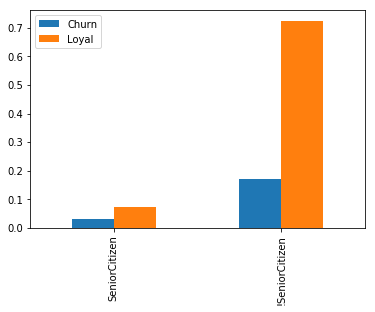

In [63]:
SC = len(Churn[(Churn.MonthlyCharges > 50) & (Churn.MonthlyCharges < 70) & (Churn.SeniorCitizen == 1)]) + len(Loyal[(Loyal.MonthlyCharges > 50) & (Loyal.MonthlyCharges < 70) & (Loyal.SeniorCitizen == 1)])
NSC = len(Churn[(Churn.MonthlyCharges > 50) & (Churn.MonthlyCharges < 70) & (Churn.SeniorCitizen == 0)]) + len(Loyal[(Loyal.MonthlyCharges > 50) & (Loyal.MonthlyCharges < 70) & (Loyal.SeniorCitizen == 0)])
S = SC + NSC
X = pd.DataFrame([ [len(Churn[(Churn.MonthlyCharges > 50) & (Churn.MonthlyCharges < 70) & (Churn.SeniorCitizen == 1)])/S,
                  len(Loyal[(Loyal.MonthlyCharges > 50) & (Loyal.MonthlyCharges < 70) & (Loyal.SeniorCitizen == 1)])/S],
                  [len(Churn[(Churn.MonthlyCharges > 50) & (Churn.MonthlyCharges < 70) & (Churn.SeniorCitizen == 0)])/S,
                  len(Loyal[(Loyal.MonthlyCharges > 50) & (Loyal.MonthlyCharges < 70) & (Loyal.SeniorCitizen == 0)])/S]],
                  columns = ['Churn', 'Loyal'], index = ['SeniorCitizen', '!SeniorCitizen'])           
X.plot.bar()

    Indeed, looks like several are too expensive. Let us find out which product is the problem.

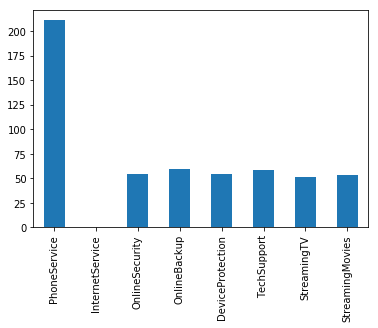

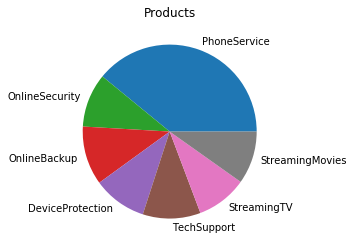

In [57]:
index = ['PhoneService', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
         'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
X = []
for i in index:
    X.append(len(Churn[(Churn[i] == "Yes") & (Churn.MonthlyCharges > 50) & (Churn.MonthlyCharges < 70)]))

X = pd.DataFrame({'' : X}, index)
X.plot.bar(legend = False)
X.plot.pie(y = '', legend = False, title = 'Products')

    Our recommendation would be to have a look at a PhoneService prices as they seem to be too expensive.

## Customer lifetime value 

    The origin idea to calculate the CLV is to calculate the difference between the discounted    value of gross contribution per customer and the discounted value of retention costs per      customer per year. The formula is shown below:

$$ CLV = GC \sum_{i=1}^{n} \frac{r^i}{(1+d)^i}- M \sum_{i=1}^{n} \frac{r^{i-1}}{(1+d)^{i-0.5}} $$

    In this case, GC stands for monthly gross contribution per customer, M means the retention         costs per customer per month, n is the horizon (in years), r is the monthly retention rate and d is the monthly discount rate.In this case, we assume that the retention rate is a constant.

    But, unfortunately, we can't estimate the retention cost based on the data we have. So we just add another assumption to deal with it.We assume that every customer will have an infinite    economic life. In other words, 
$$n \rightarrow \infty$$
    
    Now, we can simplify the equation above as below:

$$CLV = GC \frac{r}{1+d-r}$$

    The current interest rate is sometimes used as a simple (but incorrect) proxy for discount         rate. Now we choose to use the one-month yield of the government bonds as approximation for      the discount rate because we only have the monthly charges in the dataset. Data source is from "http://www.worldgovernmentbonds.com/country/united-states/".

In [19]:
#Derive the retention rate
loyal=dataframe[dataframe.Churn=='No']
retention_rate=len(loyal)/len(dataframe)
retention_rate
dis_rate_us=0.02438

factor_us=retention_rate/(1-retention_rate+dis_rate_us)

def discountvalue(D,T):
    return (D*(1+dis_rate_us)/dis_rate_us)*(1-np.power(1+dis_rate_us,-T))

disvalue=[]
for j in range(0,len(loyal)):
    disvalue.append(discountvalue(dataframe.MonthlyCharges.values[j], dataframe.tenure.values[j]))

disvalue=pd.Series(disvalue,index=loyal.index)
    
CLV_aftertenure=loyal.MonthlyCharges*factor_us


CLV=disvalue+CLV_aftertenure
CLV=pd.DataFrame(CLV,index=loyal.index,columns=['CLV'])

loyal=pd.concat([loyal,CLV],axis=1)
loyal_top10=loyal[loyal.CLV>=loyal.CLV.quantile(0.9)]
loyal_top50=loyal[loyal.CLV>=loyal.CLV.quantile(0.5)]

    Now, we selected the top 10% loyal customers, who will spend most money on our company.In           other words, they are our VIP customers. Now, we are going to analyze their consumption habits and do the comparision with the average loyal customers.

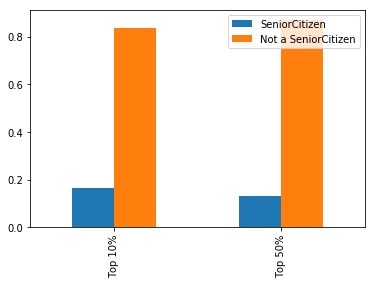

In [20]:
# distribution of the senior citizens in the loyal customer group 
Age = pd.DataFrame([[len(loyal_top10[loyal_top10.SeniorCitizen == 1])/len(loyal_top10), 
                     len(loyal_top10[loyal_top10.SeniorCitizen == 0])/len(loyal_top10)],
                    [len(loyal_top50[loyal_top50.SeniorCitizen == 1])/len(loyal_top50), 
                     len(loyal_top50[loyal_top50.SeniorCitizen == 0])/len(loyal_top50)]],
                        index = ['Top 10%', 'Top 50%'],
                        columns = ['SeniorCitizen', 'Not a SeniorCitizen'])

Age.plot.bar()

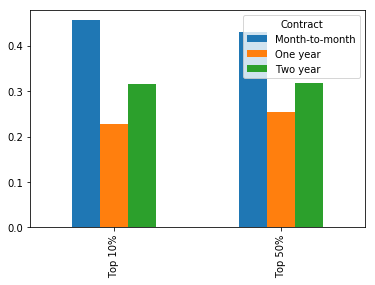

In [21]:
# distribution in the contract within the loyal customers
Contract = pd.DataFrame([loyal_top10.groupby('Contract').count().customerID/len(loyal_top10), 
                         loyal_top50.groupby('Contract').count().customerID/len(loyal_top50)],
                       index = ['Top 10%', 'Top 50%'])

Contract.plot.bar()

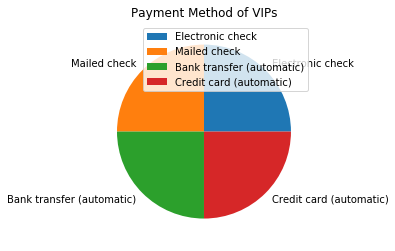

In [28]:
# Distribution of the payment methods of vip
Payment = pd.DataFrame({'' : [len(loyal_top10.PaymentMethod=='Electronic check'),
                                                    len(loyal_top10.PaymentMethod=='Mailed check'),
                                                    len(loyal_top10.PaymentMethod=='Bank transfer (automatic)'),
                                                    len(loyal_top10.PaymentMethod=='Credit card (automatic)')]}, 
                       index = ['Electronic check', 'Mailed check','Bank transfer (automatic)','Credit card (automatic)'])
Payment.plot.pie(y = '', title = 'Payment Method of VIPs')

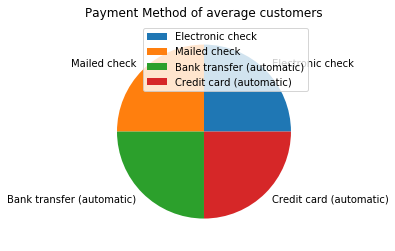

In [29]:
# Distribution of the payment methods of average customers
Payment = pd.DataFrame({'' : [len(loyal_top50.PaymentMethod=='Electronic check'),
                                                    len(loyal_top50.PaymentMethod=='Mailed check'),
                                                    len(loyal_top50.PaymentMethod=='Bank transfer (automatic)'),
                                                    len(loyal_top50.PaymentMethod=='Credit card (automatic)')]}, 
                       index = ['Electronic check', 'Mailed check','Bank transfer (automatic)','Credit card (automatic)'])
Payment.plot.pie(y = '', title = 'Payment Method of average customers')

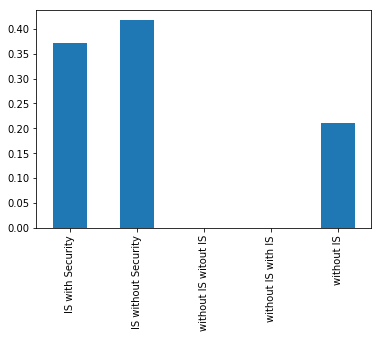

In [30]:
Internet_Security_VIP = pd.DataFrame([len(loyal_top10[(loyal_top10.InternetService != "No") & (loyal_top10.OnlineSecurity == 'Yes')])/len(loyal_top10),
                                  len(loyal_top10[(loyal_top10.InternetService != "No") & (loyal_top10.OnlineSecurity == 'No')])/len(loyal_top10),
                                  len(loyal_top10[(loyal_top10.InternetService == "No") & (loyal_top10.OnlineSecurity == 'No')])/len(loyal_top10),
                                  len(loyal_top10[(loyal_top10.InternetService == "No") & (loyal_top10.OnlineSecurity == 'Yes')])/len(loyal_top10),
                                  len(loyal_top10[(loyal_top10.InternetService == "No")])/len(loyal_top10)],
                                 index = ['IS with Security', 'IS without Security', 'without IS witout IS',
                                          'without IS with IS', 'without IS'])
Internet_Security_VIP.plot.bar(legend = False)

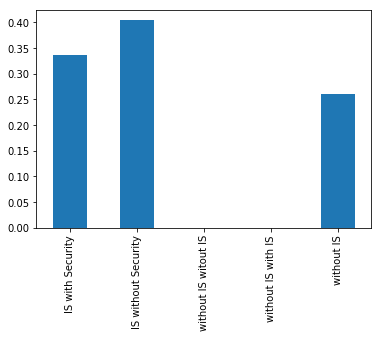

In [31]:
Internet_Security_avgcus = pd.DataFrame([len(loyal_top50[(loyal_top50.InternetService != "No") & (loyal_top50.OnlineSecurity == 'Yes')])/len(loyal_top50),
                                  len(loyal_top50[(loyal_top50.InternetService != "No") & (loyal_top50.OnlineSecurity == 'No')])/len(loyal_top50),
                                  len(loyal_top50[(loyal_top50.InternetService == "No") & (loyal_top50.OnlineSecurity == 'No')])/len(loyal_top50),
                                  len(loyal_top50[(loyal_top50.InternetService == "No") & (loyal_top50.OnlineSecurity == 'Yes')])/len(loyal_top50),
                                  len(loyal_top50[(loyal_top50.InternetService == "No")])/len(loyal_top50)],
                                 index = ['IS with Security', 'IS without Security', 'without IS witout IS',
                                          'without IS with IS', 'without IS'])
Internet_Security_avgcus.plot.bar(legend = False)